[![Open in Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/fat-forensics/events/master?filepath=resources%2F2022_ETH%2Fslides%2FETH.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fat-forensics/events/blob/master/resources/2022_ETH/slides/ETH.ipynb)
[![new BSD](https://img.shields.io/github/license/fat-forensics/events.svg)](https://github.com/fat-forensics/events/blob/master/LICENCE)

# Mind the Gap! #
## Bridging Explainable Artificial Intelligence and Human Understanding ##

Slides for a 2022 invited talk at *ETH Zürich*.

> Myriad approaches exist to help humans peer inside automated decision-making systems
> based on artificial intelligence and machine learning algorithms.
> These tools and the insights they produce, however, tend to be complex
> socio-technological constructs themselves, hence subject to technical limitations
> as well as human biases and (possibly ill-defined) preferences.
> Under these conditions, how can we ensure that explanations are meaningful and
> fulfil their role by leading to understanding?
>
> In this talk I will provide a high-level introduction to and overview of explainable
> AI and interpretable ML, followed by a deep dive into practical aspects of a popular
> explainability algorithm.
> I will demonstrate how different configurations of an explainer – that is often
> presented as a monolithic, end-to-end tool – may impact the resulting insights.
> I will then show the importance of the strategy employed to present them to a user,
> arguing in favour of a clear separation between the technical and social aspects of
> such techniques.
> Importantly, understanding these dependencies can help us to build bespoke explainers
> that are robust, reliable, trustworthy and suitable for the unique problem at hand.

---

This presentation is created with [RISE](https://rise.readthedocs.io/) and
offered as a Jupyter Notebook.
To launch the slideshow (based on the [reveal.js](https://revealjs.com/)
framework) install the dependencies (`pip install -r requirements.txt`) and
open the notebook within a Jupyter Notebook environment (not Jupyter Lab);
next:

1. execute all cells, and
2. launch RISE presentation by clicking the bar chart icon
   (<img src="../../../assets/images/barchart.svg" width=20px />) shown in the
   Jupyter Notebook toolbar.

More details are available on
<https://events.fat-forensics.org/2022_eth>.

<h1 style="text-align: center">Mind the Gap!</h1>
<h2 style="text-align: center">Bridging Explainable Artificial Intelligence and</br>Human Understanding</h2>
<br><br><br><br><br><br>  
<img width="10%" style="vertical-align:bottom; float:left;" src="../../../assets/images/adms-logo-bk.svg">
<p style="vertical-align:bottom; float:right; font-size: 120%;"><b>Kacper Sokol</b></p>

In [1]:
import os
REPOSITORY = (
    'https://raw.githubusercontent.com/fat-forensics/resources/master/{}')
SCRIPTS = [
    'surrogates_overview/scripts/__init__.py',
    'surrogates_overview/scripts/image_classifier.py',
    'surrogates_overview/scripts/imagenet_label_map.py',
    'surrogates_overview/scripts/surrogates_overview.py'
]

! pip install -r requirements.txt

img = 'doggo.jpg'
img_path = 'surrogates_overview/img/{}'.format(img)
img_url = REPOSITORY.format(img_path)
if not os.path.exists(img):
    ! wget $img_url -O $img

scr = 'scripts/'
! mkdir -p $scr
for script in SCRIPTS:
    url = REPOSITORY.format(script)
    scrpt = scr + os.path.basename(script)
    if not os.path.exists(scrpt):
        ! wget $url -O $scrpt

You should consider upgrading via the '/Users/kacper/.pyenv/versions/3.8.13/envs/limetree/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [3]:
from PIL import Image

import numpy as np

import scripts.image_classifier as imgclf
import scripts.pi_ice_pd as pid
import scripts.surrogates_overview as exo

import sklearn.datasets
import sklearn.linear_model

22-Oct-14 14:44:53 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [4]:
# Load the image
doggo_img = Image.open('doggo.jpg')
doggo_array = np.array(doggo_img)

# Load the classifier
clf = imgclf.ImageClassifier()

# doggo_y = clf.predict(doggo)
doggo_proba = clf.predict_proba([doggo_array])
doggo_labels_3 = clf.proba2tuple(doggo_proba, labels_no=3)[0]

# Fix global options
SAMPLES = 10
BATCH = 100

/Users/kacper/.pyenv/versions/3.8.13/envs/limetree/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/kacper/.pyenv/versions/3.8.13/envs/limetree/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<h2 style="text-align: center">What is Explainability?</h2>

</br>

<p style="text-align: center"><b>(You know it when you see it!)</b></p>

### Explainability lacks a universally accepted definition ###
<!-- **Explainability lacks a universally accepted definition** -->

* **Simulatability**\
  (*Lipton, 2018. The mythos of model interpretability*)
* **The Chinese Room Theorem**\
  (*Searle, 1980. Minds, brains, and programs*)
* **Mental Models**\
  (*Kulesza et al., 2013. Too much, too little, or just right? Ways explanations impact end users' mental models*)
  - **Functional** – operationalisation without understanding
  - **Structural** – appreciation of the underlying mechanism

### Defining explainability ###
</br>
$$
\texttt{Explainability} \; =
$$
<br>
$$
\underbrace{ \texttt{Reasoning} \left( \texttt{Transparency} \; | \; \texttt{Background Knowledge} \right)}_{\textit{understanding}}
$$

* *Transparency* – **insight** (of arbitrary complexity) into operation of a system
* *Background Knowledge* – implicit or explicit **exogenous information**
* *Reasoning* – **algorithmic** or **mental processing** of information

Explainability &rarr; **explainee** walking away with **understanding**

</br></br><p style="float:right; font-size:18px;">(<i>Sokol and Flach, 2021. Explainability Is in the Mind of the Beholder: Establishing the Foundations of Explainable Artificial Intelligence</i>)</p>

### Understanding, explainability & transparency ###
<!-- **Explainability is not a binary property; it is a continuous spectrum.** -->
</br>

A **continuous spectrum** rather than a binary property

</br>
<img width="75%" align="middle" src="../../../assets/images/figures/blackboxiness.svg" alt="shades of blackboxiness" style="display: block; margin-left: auto; margin-right: auto;">

<h2 style="text-align: center">Surrogates Case Study<br><br>(The Universal Explainers)</h2>

### LIME: Local Interpretable Model-agnostic Explanations ###

</br>
<img width="60%" align="middle" src="../../../assets/images/figures/lime.png" alt="LIME" style="display: block; margin-left: auto; margin-right: auto;">
    
<span style="font-size: 18px;">(*Ribeiro et al., 2016. "Why should I trust you?" Explaining the predictions of any classifier*)</span>

### Benefits ###

<div class="row">
<div class="column">

* **Model-agnostic** – work with any black box
* **Post-hoc** – can be retrofitted into pre-existing predictors
* **Data-universal** – work with image, tabular and text data because of interpretable data representations

</div>
<div class="column">
<br><br>

<!-- https://www.kindpng.com/imgv/hTbmhJ_silver-bullet-image-png-transparent-png/ -->
<img width="90%" align="middle" src="../../../assets/images/figures/bullet.png" alt="silver bullet" style="display: block; margin-left: auto; margin-right: auto;">

</div>
</div>

### Caveat: The No Free Lunch Theorem ###

<img width="75%" align="middle" src="../../../assets/images/figures/lunch.jpeg" alt="no-free-lunch" style="display: block; margin-left: auto; margin-right: auto;">

### Post-hoc explainers have poor fidelity ###

<div class="row">

<div class="column">

<br>
<img width="90%" align="middle" src="../../../assets/images/figures/stop.png" alt="ante-hoc explainability" style="display: block; margin-left: auto; margin-right: auto;">

</div>

<div class="column fragment">
    
* Explainability needs a **process** similar to *KDD*, *CRISP-DM* or *BigData*

<img width="40%" align="middle" src="../../../assets/images/figures/proc.png" alt="data process" style="display: block; margin-left: auto; margin-right: auto;">

<div class="fragment">
    
* Focus on engineering **informative features** and **inherently transparent models**

> **It requires effort**

</div>

</div>

</div>

### XAI process ###

<img width="15%" style="vertical-align:top; float:right;" src="../../../assets/images/figures/xai-process.png">

A **generic** eXplainable Artificial Intelligence process is *beyond our reach* at the moment
- **XAI Taxonomy** spanning social and technical desiderata:\
  &bull; Functional &bull; Operational &bull; Usability &bull; Safety &bull; Validation &bull;\
  <span style="font-size: 18px;">(*Sokol and Flach, 2020. Explainability Fact Sheets: A Framework for Systematic Assessment of Explainable Approaches*)</span>

- **Framework** for black-box explainers\
  <span style="font-size: 18px;">(*Henin and Le Métayer, 2019. Towards a generic framework for black-box explanations of algorithmic decision systems*)</span>

<img width="60%" align="middle" src="../../../assets/images/figures/framework.png" alt="XAI process" style="display: block; margin-left: auto; margin-right: auto;">

### bLIMEy, there has to be a better way... ###

<img width="15%" style="vertical-align:top; float:right;" src="../../../assets/images/figures/blimey.jpg">

bLIMEy &rarr; build LIME yourself\
(*Sokol et al., 2019. bLIMEy: Surrogate prediction explanations beyond LIME*)
* Framework for building surrogate explainers
* Meta-algorithm for operationalising them
* Accompanied by analysis of surrogate building blocks (akin to a user guide)
* Practical recommendations

**Good news:** A means to build flexible, faithful, interactive, ... surrogates\
**Not so good news:** It requires effort

<img width="35%" align="right" src="../../../assets/images/figures/blimey-proc.svg" alt="bLIMEy framework" style="vertical-align:top; float:right;">

### bLIMEy Framework

<img width="90%" align="middle" src="../../../assets/images/figures/blimey-proc.svg" alt="bLIMEy framework" style="display: block; margin-left: auto; margin-right: auto;">

### Operationalising surrogates ###

</br>
<div class="row">
<div style="flex: 75%;">

- To **use** surrogates, we need to understand
  * their provenance
  * how to (correctly) interpret their explanations

- To **build** surrogates, we should
  * choose suitable building blocks
  * evaluate & validate these

</div>
<div style="flex: 25%;">

<img width="95%" align="middle" src="../../../assets/images/figures/lime.png" alt="LIME" style="display: block; margin-left: auto; margin-right: auto;">

<!-- **LIME: Local Interpretable Model-agnostic Explanations** -->
    
<!-- <span style="font-size: 18px;">(*Ribeiro et al., 2016. "Why should I trust you?" Explaining the predictions of any classifier*)</span> -->

</div>
</div>

<h2 style="text-align: center">Surrogate Image Explainers</h2>

### Image surrogates (LIME) ###

<div class="row">
<div class="column">
<br>
<img width="50%" align="middle" src="../../../assets/images/figures/lime.png" alt="LIME" style="display: block; margin-left: auto; margin-right: auto;">

</div>
<div class="column fragment">
<br>
<img width="70%" align="middle" src="../../../assets/images/figures/surrogate-images.svg" alt="bLIMEy image" style="display: block; margin-left: auto; margin-right: auto;">

</div>
</div>

<img width="70%" align="middle" src="../../../assets/images/figures/blimey_img.png" alt="bLIMEy image explanation" style="display: block; margin-left: auto; margin-right: auto;">

### Segmentation-based interpretable representation ###

</br>
<img height="100%" align="middle" src="../../../assets/images/figures/int_rep-img_ir.svg" alt="bLIMEy image interpretable representation -- forward" style="display: block; margin-left: auto; margin-right: auto;">
<br>
<img height="100%" align="middle" src="../../../assets/images/figures/int_rep-img_ri.svg" alt="bLIMEy image interpretable representation -- reverse" style="display: block; margin-left: auto; margin-right: auto;">

### Black-box prediction ###

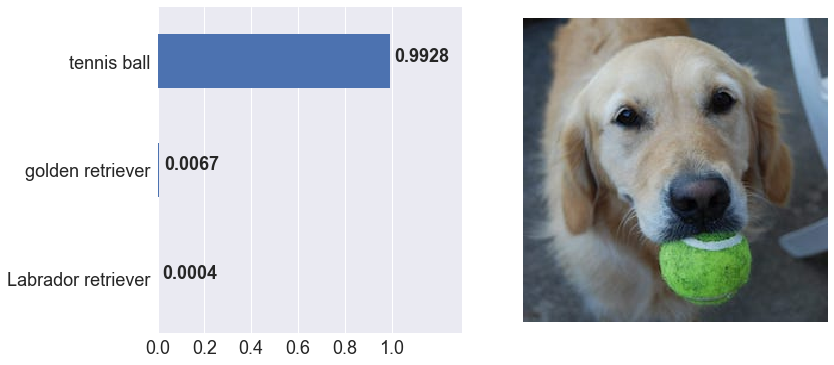

In [5]:
classification = exo.plot_image_prediction(doggo_labels_3, doggo_array)

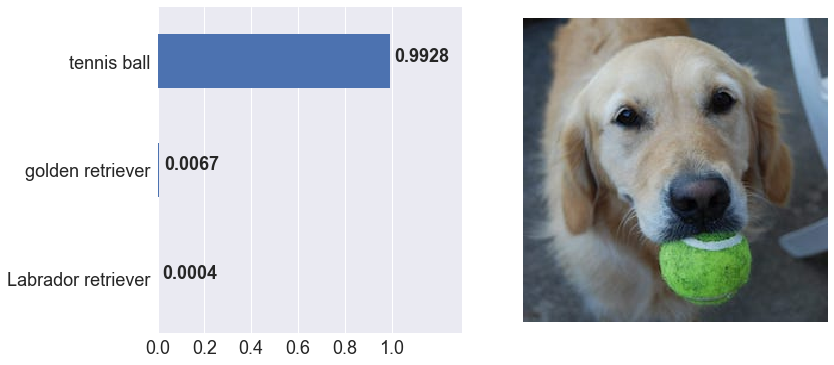

In [6]:
classification

### Prediction explanation ###

In [7]:
# LIME explanation for tennis ball/golden retriever/Labrador retriever <->
# image colouring <-> bar plot
explain_classes = [(i[0], i[2]) for i in doggo_labels_3]
blimey_image = exo.build_image_blimey(
    doggo_array,
    clf.predict_proba,
    explain_classes,
    explanation_size=5,
    segments_number=13,
    occlusion_colour='mean',
    samples_number=SAMPLES,
    batch_size=BATCH,
    random_seed=42)

22-Oct-14 14:44:53 fatf         INFO     Seeding RNGs using the input parameter.
22-Oct-14 14:44:53 fatf         INFO     Seeding RNGs with 42.


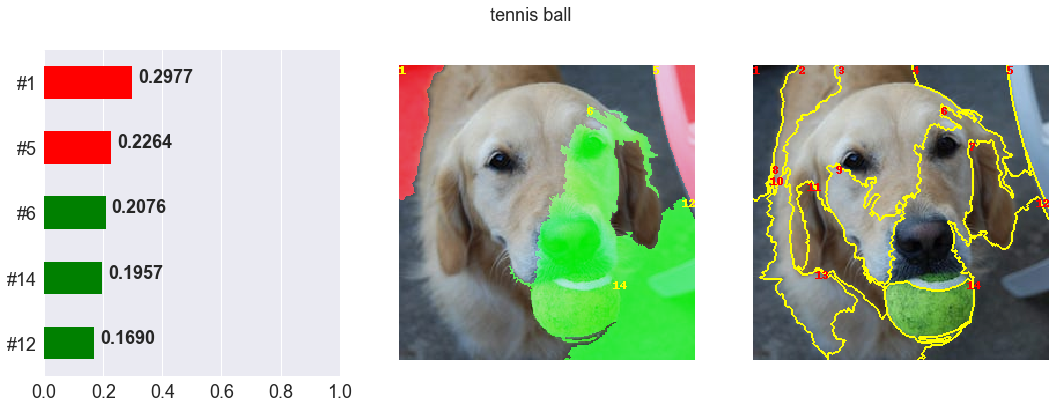

In [8]:
exo.plot_image_explanation(blimey_image, explain_classes[0])

### Prediction explanation ###

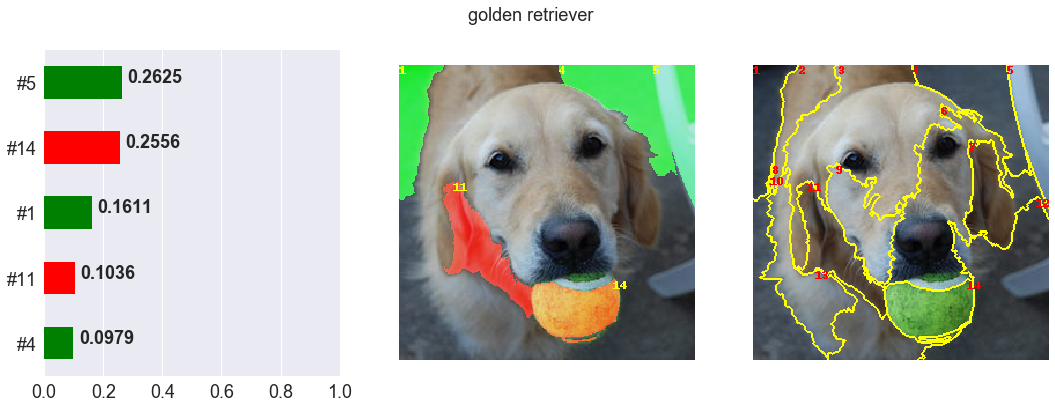

In [9]:
exo.plot_image_explanation(blimey_image, explain_classes[1])

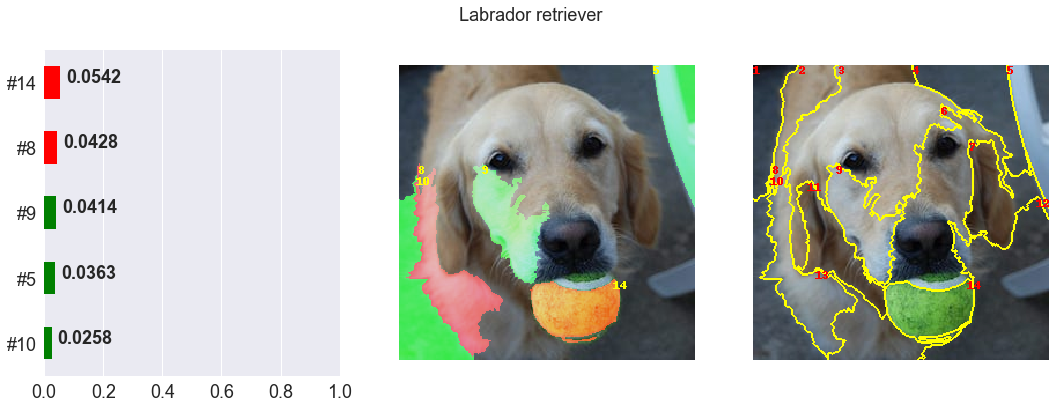

In [10]:
exo.plot_image_explanation(blimey_image, explain_classes[2])

### Explainer demo ###

In [11]:
# Configure widgets to select occlusion colour, segmentation granularity and
# explained class
colour_selection = {
    i: i for i in ['mean', 'black', 'white', 'randomise-patch', 'green']
}
granularity_selection = {'low': 13, 'medium': 30, 'high': 50}
class_selection = {label: class_id for label, class_id in explain_classes}

In [12]:
# Generate explanations
blimey_image_collection = {}
for gran_name, gran_number in granularity_selection.items():
    blimey_image_collection[gran_name] = {}
    for col_name in colour_selection:
        blimey_image_collection[gran_name][col_name] = exo.build_image_blimey(
            doggo_array,
            clf.predict_proba,
            explain_classes,
            explanation_size=5,
            segments_number=gran_number,
            occlusion_colour=col_name,
            samples_number=SAMPLES,
            batch_size=BATCH,
            random_seed=42)

22-Oct-14 14:44:54 fatf         INFO     Seeding RNGs using the input parameter.
22-Oct-14 14:44:54 fatf         INFO     Seeding RNGs with 42.
22-Oct-14 14:44:55 fatf         INFO     Seeding RNGs using the input parameter.
22-Oct-14 14:44:55 fatf         INFO     Seeding RNGs with 42.
22-Oct-14 14:44:55 fatf         INFO     Seeding RNGs using the input parameter.
22-Oct-14 14:44:55 fatf         INFO     Seeding RNGs with 42.
22-Oct-14 14:44:55 fatf         INFO     Seeding RNGs using the input parameter.
22-Oct-14 14:44:55 fatf         INFO     Seeding RNGs with 42.
22-Oct-14 14:44:56 fatf         INFO     Seeding RNGs using the input parameter.
22-Oct-14 14:44:56 fatf         INFO     Seeding RNGs with 42.
22-Oct-14 14:44:56 fatf         INFO     Seeding RNGs using the input parameter.
22-Oct-14 14:44:56 fatf         INFO     Seeding RNGs with 42.
22-Oct-14 14:44:56 fatf         INFO     Seeding RNGs using the input parameter.
22-Oct-14 14:44:56 fatf         INFO     Seeding RNGs w

In [13]:
# Plot bar-plot explanation, image explanation and randomly occluded example
surrogate_image_explainer = exo.generate_image_widget(
    blimey_image_collection,
    granularity_selection,
    colour_selection,
    class_selection)

In [14]:
surrogate_image_explainer

### Segmentation granularity and occlusion colour – 5 segments ###
<img width="65%" align="middle" src="../../../assets/images/figures/intrep_img_5.svg" alt="bLIMEy image -- 5 segments" style="display: block; margin-left: auto; margin-right: auto;">

### Segmentation granularity and occlusion colour – 40 segments ###

<img width="65%" align="middle" src="../../../assets/images/figures/intrep_img_40.svg" alt="bLIMEy image -- 40 segments" style="display: block; margin-left: auto; margin-right: auto;">

<h2 style="text-align: center">Surrogate Explainers of Tabular Data</h2>

### Classifying iris flowers ###

<img width="30%" align="middle" src="../../../assets/images/figures/iris.png" alt="Iris Data Set" style="display: block; margin-left: auto; margin-right: auto;">
<img width="70%" align="middle" src="../../../assets/images/figures/iris-classes.jpeg" alt="Iris Classes" style="display: block; margin-left: auto; margin-right: auto;">

In [15]:
# Load the iris data set
iris = sklearn.datasets.load_iris()
iris_X = iris.data  # [:, :2]  #  take the first two features only
iris_y = iris.target

iris_labels = iris.target_names
iris_feature_names = iris.feature_names

label2class = {lab: i for i, lab in enumerate(iris_labels)}
feature2name = {i: feat for i, feat in enumerate(iris_feature_names)}

# Fit the classifier
logreg = sklearn.linear_model.LogisticRegression(C=1e5)
logreg.fit(iris_X, iris_y)

LogisticRegression(C=100000.0)

In [16]:
# Configure widgets to select explained instance, discretisation and
# explained class
_dtype = iris_X.dtype
explained_instances = {
    'setosa': np.array([5, 3.5, 1.5, 0.25]).astype(_dtype),
    'versicolor': np.array([5.5, 2.75, 4.5, 1.25]).astype(_dtype),
    'virginica': np.array([7, 3, 5.5, 2.25]).astype(_dtype)
}

petal_length_idx = iris_feature_names.index('petal length (cm)')
petal_length_bins = [1, 2, 3, 4, 5, 6, 7]
petal_width_idx = iris_feature_names.index('petal width (cm)')
petal_width_bins = [0, .5, 1, 1.5, 2, 2.5]
discretisation = {
    petal_length_idx: {
        'range': petal_length_bins,
        'default': [2, 3],
        'step': 1
    },
    petal_width_idx: {
        'range': petal_width_bins,
        'default': [.5, 1],
        'step': .5
    }
}

# Fix global options
SAMPLE_IRIS = False
IRIS_SAMPLES = 50000

In [17]:
surrogate_tabular_explainer = exo.generate_tabular_widget(
    explained_instances,
    discretisation,
    label2class,
    feature2name,
    iris_X,
    iris_y,
    logreg.predict_proba,
    samples_number=IRIS_SAMPLES,
    sample=SAMPLE_IRIS,
    random_seed=42)

### Tabular surrogates (LIME) ###

<div class="row">
<div class="column">
<br>
<img width="50%" align="middle" src="../../../assets/images/figures/lime.png" alt="LIME" style="display: block; margin-left: auto; margin-right: auto;">

</div>
<div class="column fragment">
<br>
<img width="70%" align="middle" src="../../../assets/images/figures/surrogate-tabular.svg" alt="bLIMEy tabular" style="display: block; margin-left: auto; margin-right: auto;">

</div>
</div>

<img width="70%" align="middle" src="../../../assets/images/figures/blimey_tab.png" alt="bLIMEy tabular explanation" style="display: block; margin-left: auto; margin-right: auto;">

### Interpretable representation ###
<br>
<img width="66%" align="middle" src="../../../assets/images/figures/tab1.svg" alt="bLIMEy tabular interpretable representation -- forward" style="display: block; margin-left: auto; margin-right: auto;">
<br>
<img width="33%" align="middle" src="../../../assets/images/figures/tab2.svg" alt="bLIMEy tabular interpretable representation -- reverse" style="display: block; margin-left: auto; margin-right: auto;">

### Explainer demo ###

In [18]:
surrogate_tabular_explainer

### But why? Meaning of the explanations ###
<br>
<img width="45%" align="middle" src="../../../assets/images/figures/tabular_ir_top-left.png" alt="bLIMEy tabular toy interpretable representation" style="display: block; margin-left: auto; margin-right: auto;">

### But why? Meaning of the explanations (ctd.) ###
<br>
<br>
<img width="100%" align="middle" src="../../../assets/images/figures/blimey_ols.svg" alt="bLIMEy tabular analytical OLS solution" style="display: block; margin-left: auto; margin-right: auto;">

> **Never let the truth get in the way of a good story**  
> —Mark Twain

<h2 style="text-align: center">Humans and Explanations<br><br>(Presenting Explanations)</h2>

### Human-Centred Explainability ###

<div class="row">
<div class="column">

<img width="90%" align="middle" src="../../../assets/images/figures/explanation.png" alt="insights from social sciences" style="display: block; margin-left: auto; margin-right: auto;">

</div>
<div class="column">
<br><br><br><br>

Human-centred explanations
    
* interactive dialogue (bi-directional)
* contrastive statements

</div>
</div>

In [19]:
colour_positive = '#FF0D57'  # 255, 13, 87   # g
colour_negative = '#1E88E5'  # 30, 136, 229  # r

middle = .2
names = ['$x_{}$'.format(i) for i in range(9)]
values = [0, 0.1, 0, 0, 0.7, -0.1, 0, -0.3, 0]
colours = [colour_negative if i < 0 else colour_positive
           for i in values]
prediction = sum(values) + middle

$$
f(\mathbf{x}) = 0.2 \;\; + \;\; 0.25 \times x_1 \;\; + \;\; 0.7 \times x_4 \;\; - \;\; 0.2 \times x_5 \;\; - \;\; 0.9 \times x_7
$$
</br>
$$
\mathbf{x} = (0.4, \ldots, 1, \frac{1}{2}, \ldots \frac{1}{3})
$$

---

$$
f(\mathbf{x}) = 0.2 \;\; \underbrace{+0.1}_{x_1} \;\; \underbrace{+0.7}_{x_4} \;\; \underbrace{-0.1}_{x_5} \;\; \underbrace{-0.3}_{x_7} \;\; = \;\; 0.6
$$

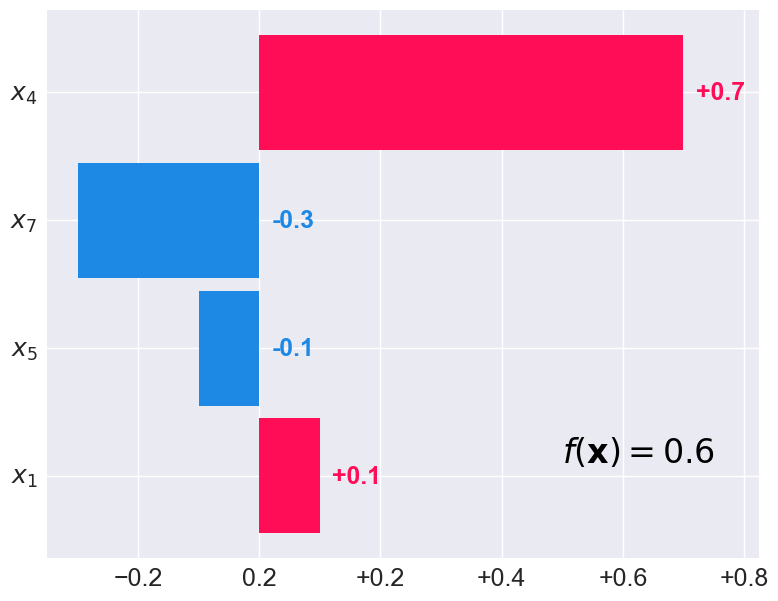

In [20]:
bar_explanation = plt.figure(figsize=(8, 6), dpi=100)
bar_explanation.patch.set_alpha(0)

# Filter
names_ = [names[i] for i, v in enumerate(values) if v]
values_ = [v for v in values if v]
colours_ = [colours[i] for i, v in enumerate(values) if v]

# Order
_ordering = np.argsort(np.abs(values_))

names_ = np.flip(np.asarray(names_)[_ordering]).tolist()
values_ = np.flip(np.asarray(values_)[_ordering]).tolist()
colours_ = np.flip(np.asarray(colours_)[_ordering]).tolist()

# Plot
plt.barh(names_[::-1],
         values_[::-1],
         color=colours_[::-1],
         height=.9)

for i, v in enumerate(values_[::-1]):
    v_s = f'+{v:.1f}' if v > 0 else f'{v:.1f}'.replace('−', '-')
    s = v + 0.02 if v > 0 else .02
    c = colour_negative if v < 0 else colour_positive
    plt.text(s, i - .06, v_s, color=c, fontweight='bold', fontsize=18)

plt.tight_layout()
left_, right_ = plt.xlim()
plt.xlim((left_, 1.10*right_))

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

ax = bar_explanation.axes[0]
x_ticks = [item.get_text() for item in ax.get_xticklabels()]
x_ticks_ = []
for i in x_ticks:
  if not i:
    x_ticks_.append(i)
    continue

  i_float = float(i.replace('−', '-'))
  if i_float < 0:
    x_ticks_.append(i)
  elif i_float == 0:
    x_ticks_.append(middle)
  else:
    x_ticks_.append(f'+{i}')
ax.set_xticklabels(x_ticks_)

plt.text(.5, 0.1, f'$f(\mathbf{{x}})={prediction}$', color='k', fontsize=24)
plt.show()

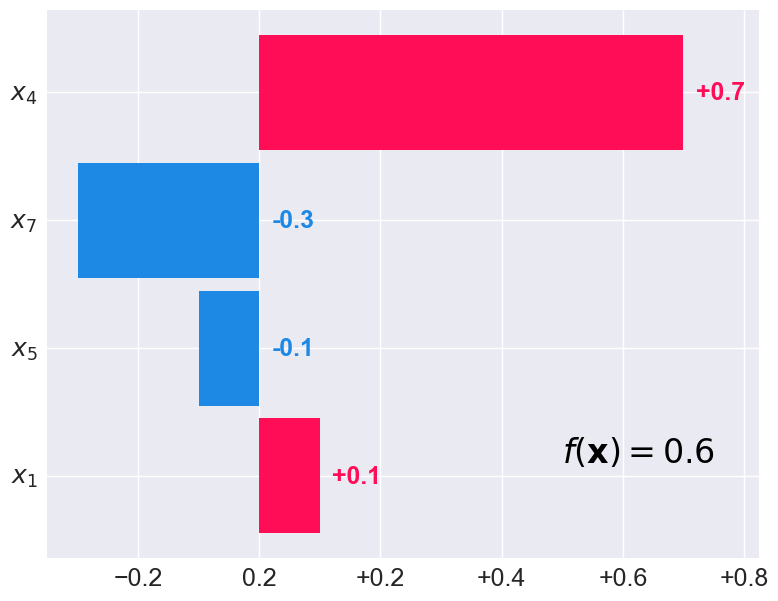

In [21]:
bar_explanation

<img width="80%" align="middle" src="../../../assets/images/figures/force-plot-x.svg" alt="force plot explanation" style="display: block; margin-left: auto; margin-right: auto;">

<h2 style="text-align: center">Evaluating Explainability</h2>

### Automated Decision-making ###
<!-- **Automated Decision-making** -->

</br>
<img width="75%" align="middle" src="../../../assets/images/figures/val-automated-decisions.svg" alt="automated decision-making workflow" style="display: block; margin-left: auto; margin-right: auto;">

### Naïve view ###
</br></br>

<img width="75%" align="middle" src="../../../assets/images/figures/val-current.svg" alt="current validation" style="display: block; margin-left: auto; margin-right: auto;">

### Explanatory insight & presentation medium ###

<img width="50%" align="middle" src="../../../assets/images/figures/val-proposed1.svg" alt="proposed validation 1" style="display: block; margin-left: auto; margin-right: auto;">

### Phenomenon & explanation ###

 <img width="25%" align="middle" src="../../../assets/images/figures/val-proposed2.svg" alt="proposed validation 2" style="display: block; margin-left: auto; margin-right: auto;">

<h2 style="text-align: center">Take-home Message</h2>

> Explainers **are not** *monolithic* entities

<br>

> They are **socio-technical** constructs

<br>

> They need to be **configured** or **tailor-made** for the application at hand

> These are **diagnostic tools** that only become **explainers** when their  
> *provenance*, *caveats*, *properties* and *outputs* are well-understood

<img width="65%" align="middle" src="../../../assets/images/figures/elephant.svg" alt="The Blind Men and the Elephant" style="display: block; margin-left: auto; margin-right: auto;">
<i style="float:left; font-size:18px;">(The Blind Men and the Elephant)</i>

> Do we really need to use complex methods to solve the problem at hand?
>
> * AI
> * ML
> * DL
> * <*insert the name of a new technology*\>

<h2 style="text-align: center">Where to Go from Here</h2>

<img width="10%" style="vertical-align:top; float:right;" src="../../../assets/images/fatf.png">
<h3><tt>FAT Forensics</tt> &lt;<a href="https://fat-forensics.org/">https://fat-forensics.org/</a>&gt;</h3>
<br>

* A modular Python toolkit for algorithmic Fairness, Accountability and **Transparency**
* Aimed at both *end-users* and *domain experts*
* Built for *research* and *deployment*

<br>

---

<br>

- *Sokol et al., 2020. FAT Forensics: A Python toolbox for implementing and deploying fairness, accountability and transparency algorithms in predictive systems*
- *Sokol et al., 2022. FAT Forensics: A Python toolbox for algorithmic fairness, accountability and transparency*

<img width="25%" style="vertical-align:top; float:right;" src="../../../assets/images/2020ecmlpkdd.png">
<h3>ECML-PKDD 2020 hands-on explainability tutorial</h3>
<br><br>

Tutorial resources: https://events.fat-forensics.org/2020_ecml-pkdd

<br>

---

<br>

- *Sokol et al., 2020. What and How of Machine Learning Transparency: Building Bespoke Explainability Tools with Interoperable Algorithmic Components*

<img width="15%" style="vertical-align:top; float:right;" src="../../../assets/images/TAILOR-logo-light-background.png">
<img width="10%" style="vertical-align:top; float:right;" src="../../../assets/images/iai-cdt.png">
<h3>Extra resources</h3>
<br><br>

* 2021 TAILOR – Summer School session
* University of Bristol Centre for Doctoral Training in Interactive Artificial Intelligence – BIAS Summer School session
* 2021 The Alan Turing Institute's AI UK
* …

<br>

---

<br>

- <https://events.fat-forensics.org/>
- <https://github.com/fat-forensics/resources>

<img width="20%" style="vertical-align:top; float:right;" src="../../../assets/images/turing.png">
<h3>Self-paced online learning materials</h3>
<br>
<!-- <br> -->

* Interactive online training resources on *interpretability*, *explainability* and *transparency*
* To be published in *Winter 2022*

<h3>PhD / Master's Course</h3>
<br>
<!-- <br> -->

* Comprehensive overview of *interpretability*, *explainability* and *transparency*
* To be delivered in *January/February 2023*
* (Possibly transformed into a MOOC later in the year)

<h2 style="text-align: center; vertical-align: center;">Questions?</h2>
<br><br><br><br><br>
<p style="text-align: right; vertical-align:bottom; float:right; font-size: 100%;">
    <a href="kacper.sokol@rmit.edu.au">Kacper.Sokol@rmit.edu.au</a>
    </br>
    <a href="K.Sokol@bristol.ac.uk">K.Sokol@bristol.ac.uk</a>
</p>

## Helpers ##

### Feature partition ###

<div class="row">
<div class="column">
<br><br>
<img width="90%" align="bottom" src="../../../assets/images/figures/discretisation_dist_annotated.png" alt="bLIMEy tabular toy partition 1" style="display: block; margin-left: auto; margin-right: auto; bottom: 0;">

</div>
<div class="column">
<br>
<img width="90%" align="bottom" src="../../../assets/images/figures/discretisation_class_annotated.png" alt="bLIMEy tabular toy partition 2" style="display: block; margin-left: auto; margin-right: auto; bottom: 0;">

</div>
</div>

### Feature partition (ctd.) ###

<div class="row">
<div class="column">
<br>
<img width="90%" align="bottom" src="../../../assets/images/figures/part-global_quartile_discretisation.svg" alt="bLIMEy tabular global quartile partition" style="display: block; margin-left: auto; margin-right: auto;">

</div>
<div class="column">
<br>
<img width="90%" align="bottom" src="../../../assets/images/figures/part-local_quartile_discretisation.svg" alt="bLIMEy tabular local quartile partition" style="display: block; margin-left: auto; margin-right: auto;">

</div>
<div class="column">
<br>
<img width="90%" align="bottom" src="../../../assets/images/figures/part-global_dt_discretisation.svg" alt="bLIMEy tabular global tree partition" style="display: block; margin-left: auto; margin-right: auto;">

</div>
<div class="column">
<br>
<img width="90%" align="bottom" src="../../../assets/images/figures/part-local_dt_discretisation.svg" alt="bLIMEy tabular local tree partition" style="display: block; margin-left: auto; margin-right: auto;">

</div>
</div>

### Sampling ###
<div class="row">
<div class="column">
<br>
<img width="90%" align="bottom" src="../../../assets/images/figures/iris_sample_normal.svg" alt="bLIMEy tabular sampling -- normal" style="display: block; margin-left: auto; margin-right: auto;">

</div>
<div class="column">
<br>
<img width="90%" align="bottom" src="../../../assets/images/figures/iris_sample_truncated_normal.svg" alt="bLIMEy tabular sampling -- truncated normal" style="display: block; margin-left: auto; margin-right: auto;">

</div>
<div class="column">
<br>
<img width="90%" align="bottom" src="../../../assets/images/figures/iris_sample_mixup.svg" alt="bLIMEy tabular sampling -- mixup" style="display: block; margin-left: auto; margin-right: auto;">

</div>
<div class="column">
<br>
<img width="90%" align="bottom" src="../../../assets/images/figures/iris_sample_normal_class_discovery.svg" alt="bLIMEy tabular sampling -- normal class discovery" style="display: block; margin-left: auto; margin-right: auto;">

</div>
</div>